<a href="https://colab.research.google.com/github/Ha-minss/Classes-in-University/blob/main/Ridge%20-%20Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes #diabete

In [6]:
diabete=load_diabetes()
df=pd.DataFrame(diabete.data, columns=diabete.feature_names)
df['degree']=diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,degree
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
input=diabete.data
output=df['degree']

In [8]:
input.shape

(442, 10)

In [9]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [10]:
from sklearn.linear_model import Ridge, Lasso
RG = Ridge(alpha= 0.1)
RG.fit(train_input, train_output)
LS = Lasso(alpha =0.1)
LS.fit(train_input, train_output)

Lasso(alpha=0.1)

In [11]:
np.corrcoef(RG.predict(test_input),test_output)

array([[1.        , 0.71237785],
       [0.71237785, 1.        ]])

In [12]:
np.corrcoef(LS.predict(test_input),test_output)

array([[1.        , 0.71752258],
       [0.71752258, 1.        ]])

In [13]:
RG.n_features_in_, LS.n_features_in_

(10, 10)

In [14]:
diabete.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
RG.coef_

array([-1.76537825e-01, -2.08179887e+02,  4.67382536e+02,  2.91958950e+02,
       -7.89764655e+01, -1.12742379e+02, -1.64159253e+02,  1.68409911e+02,
        4.04499509e+02,  7.72252915e+01])

In [17]:
LS.coef_

array([  -0.        , -162.48447091,  510.11006206,  270.83308948,
        -75.38054112,   -0.        , -192.14605506,    0.        ,
        480.97019021,   11.61842036])

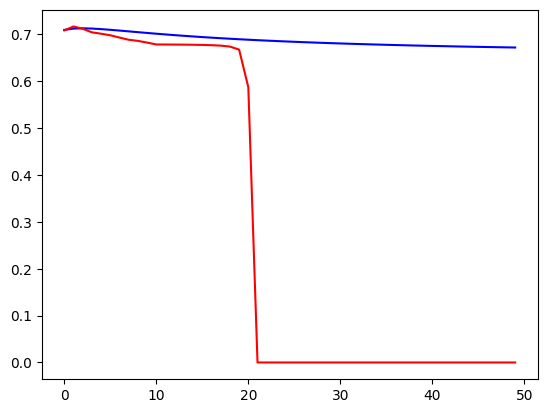

In [18]:
RG_corr=[]
LS_corr=[]
i_num = 0
for i in np.arange(0.01, 5.0, 0.1):
  RG = Ridge(alpha= i)
  RG.fit(train_input,train_output)
  LS=Lasso(alpha=i)
  LS.fit(train_input,train_output)
  RG_corr.append(np.corrcoef(RG.predict(test_input),test_output)[0][1])
  LS_corr.append(np.corrcoef(LS.predict(test_input),test_output)[0][1])
  i_num+=1

plt.plot(range(i_num),RG_corr,'b')
plt.plot(range(i_num),LS_corr,'r')
